In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Diwali Sales Data.csv',encoding='unicode_escape')

In [3]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
#to drop unwanted cols. from given dataset permanently
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [5]:
#null values
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [6]:
df.dtypes

User_ID               int64
Cust_name            object
Product_ID           object
Gender               object
Age Group            object
Age                   int64
Marital_Status        int64
State                object
Zone                 object
Occupation           object
Product_Category     object
Orders                int64
Amount              float64
dtype: object

In [7]:
df.head(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0


In [8]:
#find mean and fill null values in amount col.
m=df['Amount'].mean()

df['Amount'].fillna(m,inplace=True)
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

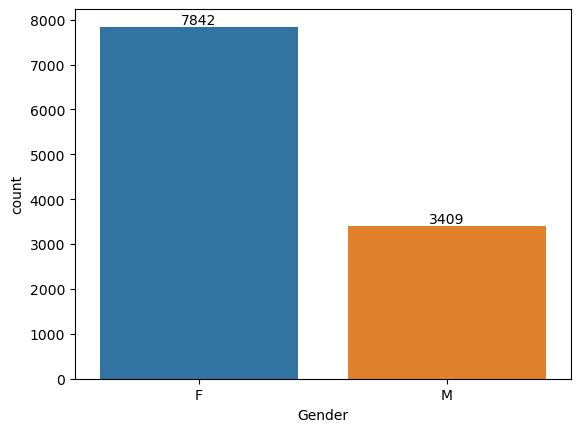

In [9]:
#Data Analysis
# plotting a bar chart for Gender and it's count
ax=sns.countplot(data=df,x='Gender')

for bars in ax.containers:
    ax.bar_label(bars)
    
plt.show()

<Axes: xlabel='Gender', ylabel='Amount'>

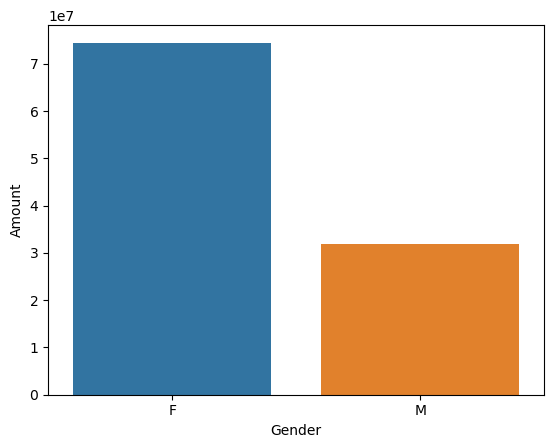

In [10]:
#plotting the bar chart for Gender vs Total amount

#groupby()

sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen)

In [ ]:
#conclusion: from above graph we can see that most of the customers are females
#and even the purchasing power of females is greater than male.

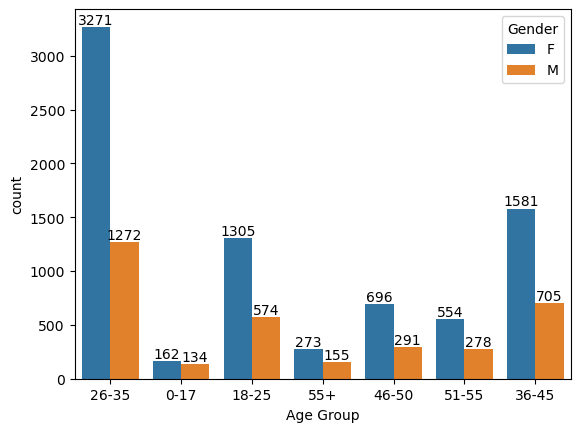

In [12]:
#age group wise Gender
ax=sns.countplot(data=df,x='Age Group',hue='Gender')

for bars in ax.containers:
    ax.bar_label(bars)
    
plt.show()

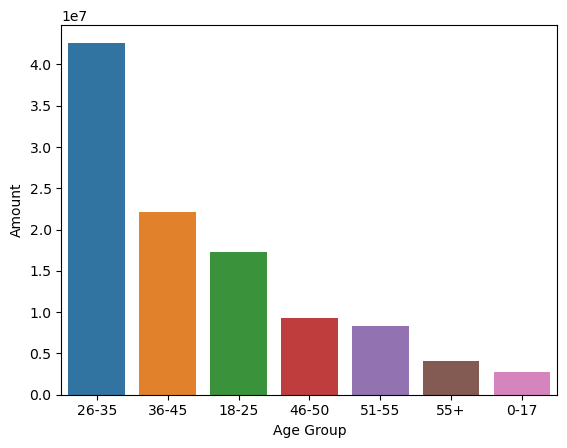

In [15]:
#Total Amount vs Age Group
sale_age=df.groupby('Age Group',as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(data=sale_age,x='Age Group',y='Amount')

plt.show()

In [16]:
#concusion: from above graph we can see that most of the customers are from the age group betwn 26-35 yrs(female)

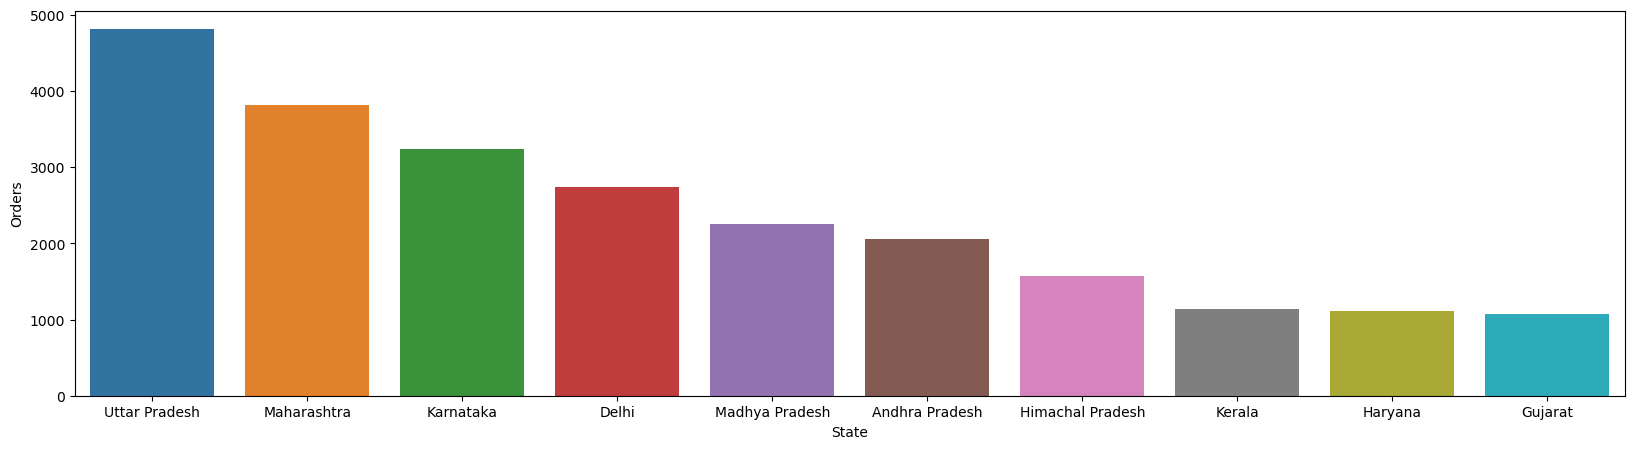

In [17]:
#total no of orders from top 10 states
sales_state=df.groupby('State',as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

plt.figure(figsize=(20,5))
sns.barplot(data = sales_state, x = 'State',y= 'Orders')

plt.show()

<Axes: xlabel='State', ylabel='Amount'>

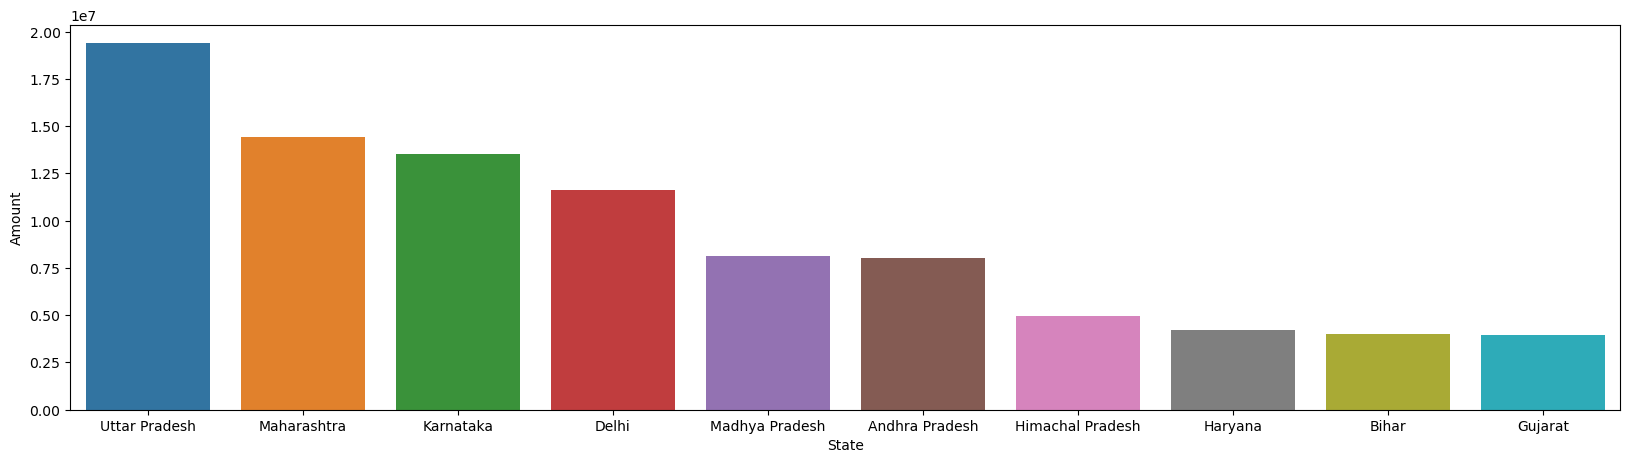

In [20]:
#total sales amount from top 10 state
#show amount wise highest sales by states
sales_state_amt = df.groupby('State', as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

plt.figure(figsize=(20,5))

# Plotting the barplot
sns.barplot(data=sales_state_amt, x='State', y='Amount')

In [22]:
#From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively

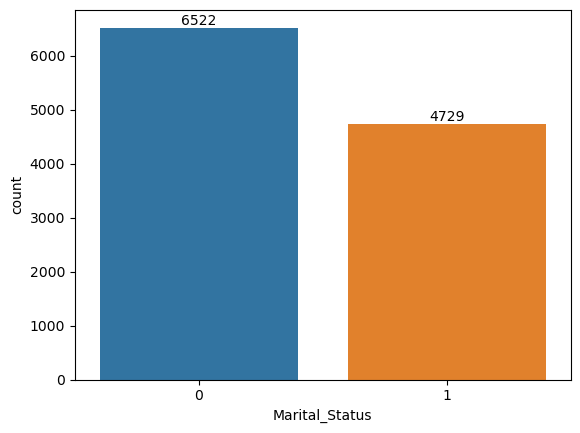

In [23]:
#Marital Status
#how many people are married/unmaried
ax=sns.countplot(data=df,x='Marital_Status')

for bars in ax.containers:
    ax.bar_label(bars)


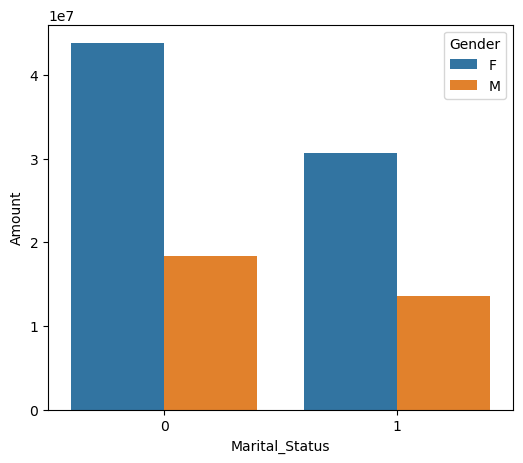

In [26]:
sales_status_gender=df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

plt.figure(figsize=(6,5))
sns.barplot(data=sales_status_gender,x='Marital_Status',hue='Gender',y='Amount')

plt.show()


In [ ]:
#from above graph we can see that most of the buyers are married(female) and they have high purchasing power.

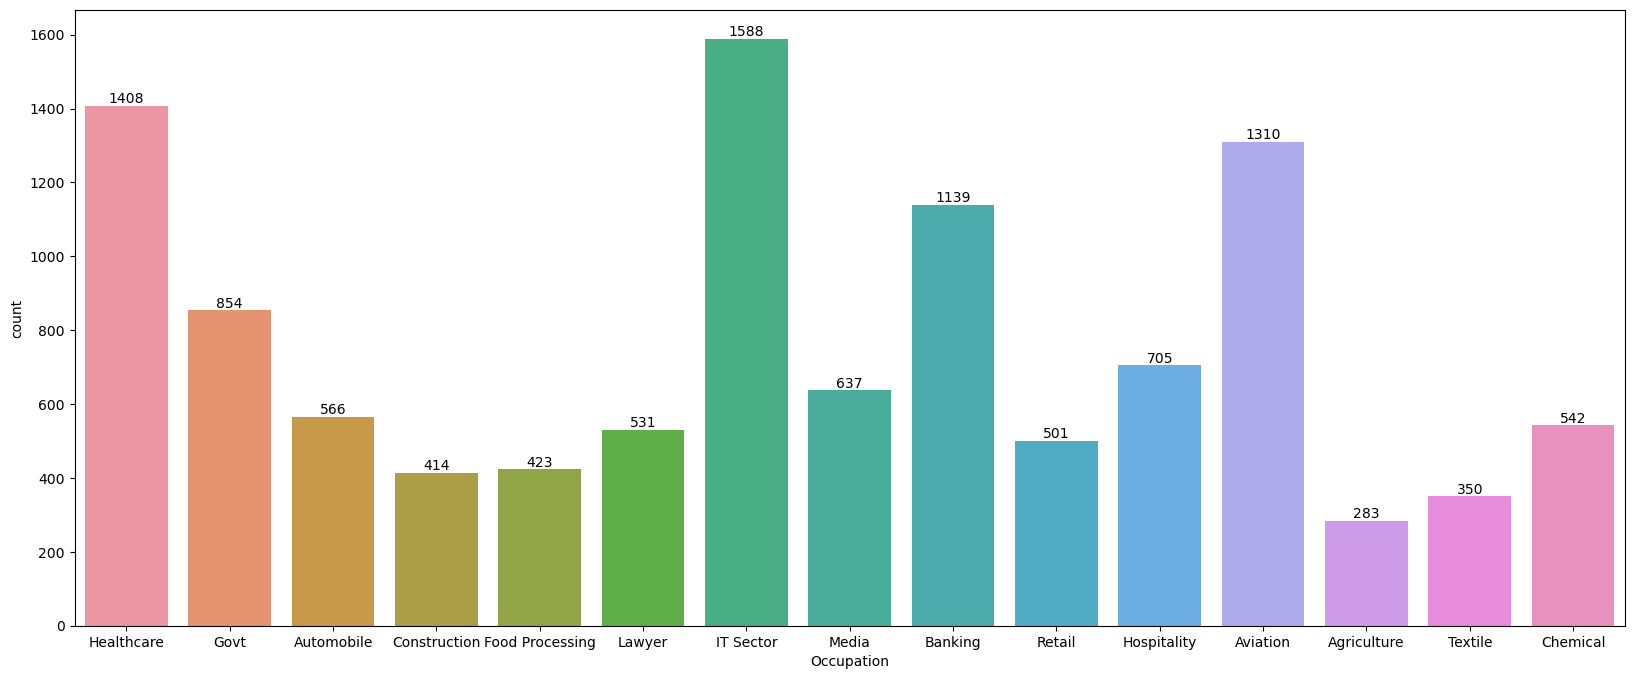

In [27]:
#occpation:
plt.figure(figsize=(20,8))
ax=sns.countplot(data=df,x='Occupation')
for bars in ax.containers:
    ax.bar_label(bars)
    
plt.show()

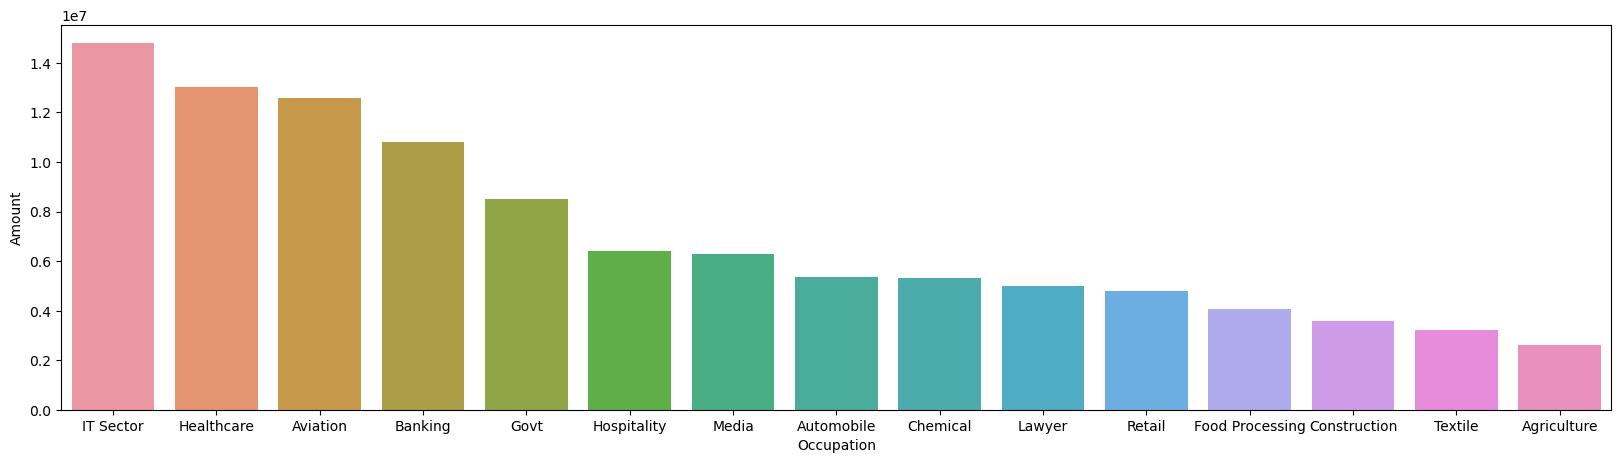

In [28]:
#amount wise sales with occupation
sales_occup_amt=df.groupby('Occupation',as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

#visualise
plt.figure(figsize=(20,5))
sns.barplot(data=sales_occup_amt,x='Occupation',y='Amount')
plt.show()

In [ ]:
#from above graph we can see that most of the buyers are working in IT,Healthcare and Aviation sector

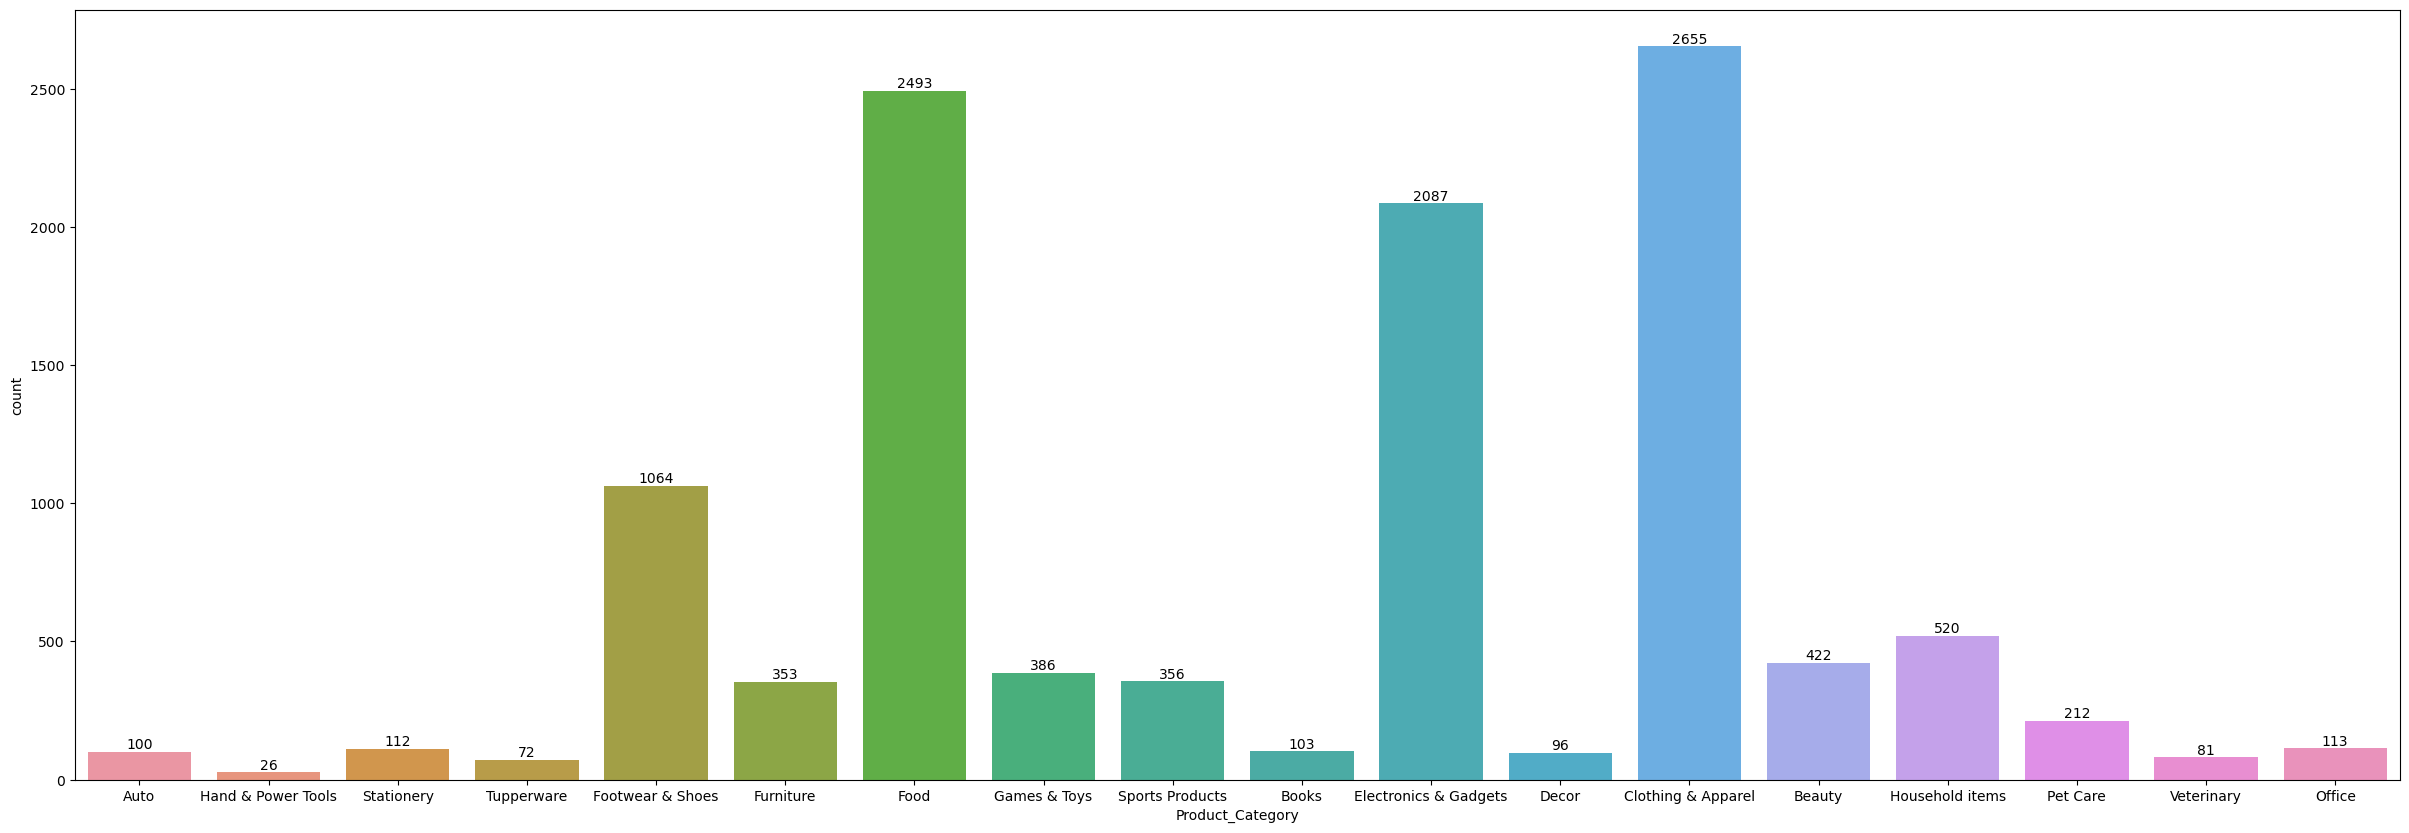

In [29]:
#product category
plt.figure(figsize=(30,10))
ax=sns.countplot(data=df,x='Product_Category')
for bars in ax.containers:
    ax.bar_label(bars)
    
plt.show()

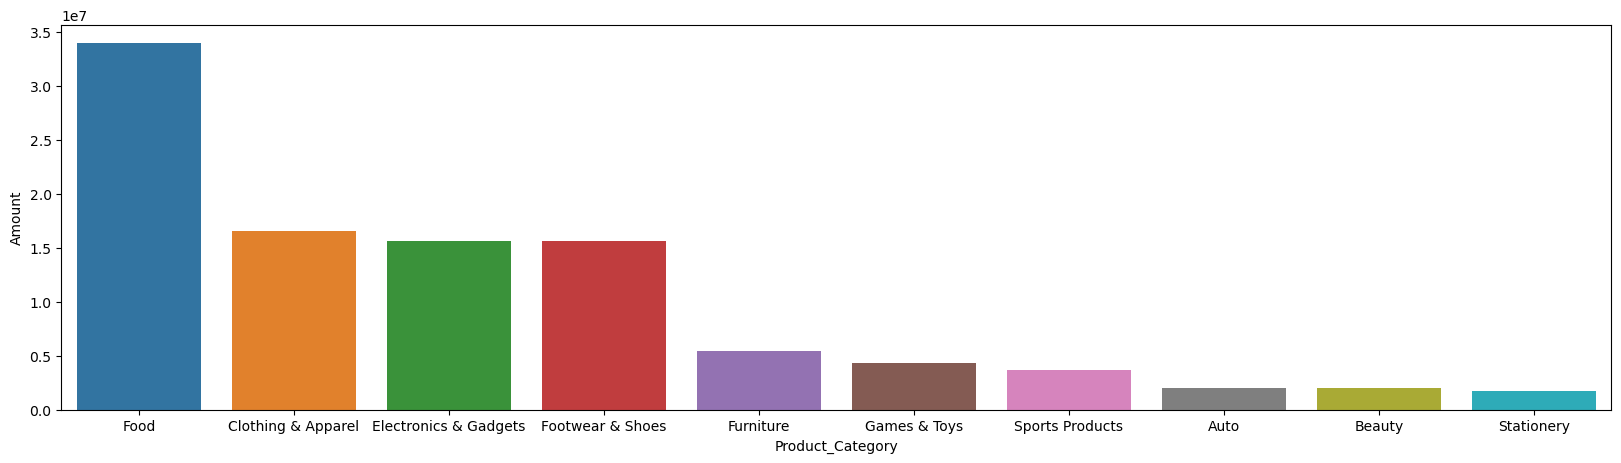

In [30]:
#amount wise sales with Product category
sales_product_amt=df.groupby('Product_Category',as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

plt.figure(figsize=(20,5))
sns.barplot(data=sales_product_amt,x='Product_Category',y='Amount')
plt.show()

In [ ]:
#from above graph we can see that most of products sold are food,clothing and electronics caegory.

<Axes: xlabel='Product_ID', ylabel='Orders'>

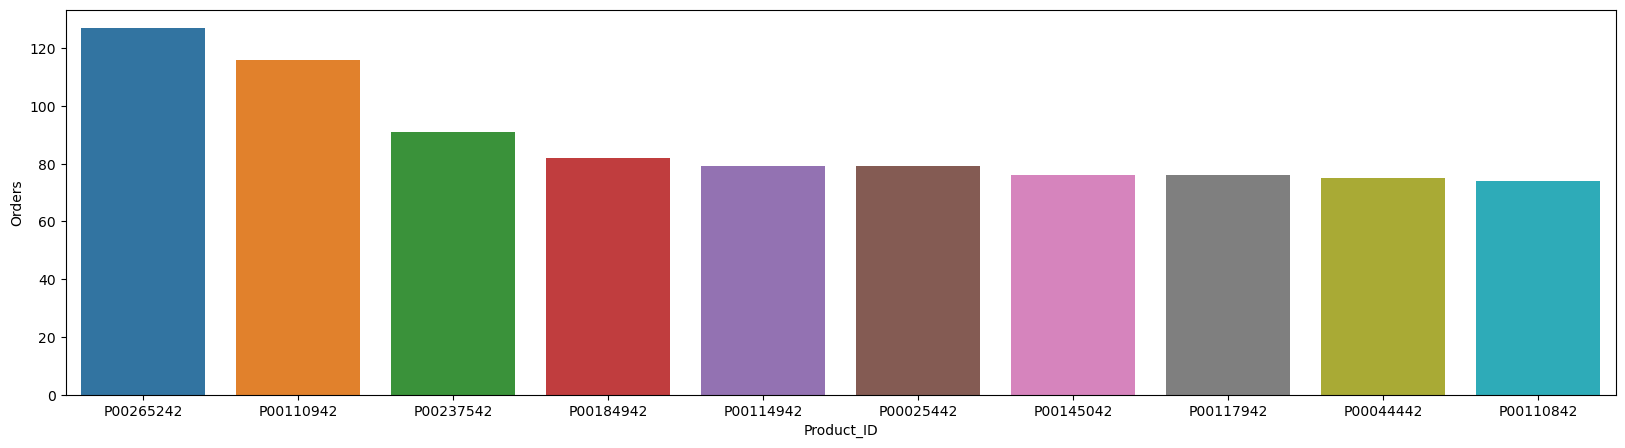

In [31]:
#amount wise sales with ProductID
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

plt.figure(figsize=(20,5))
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders')

<Axes: xlabel='Product_ID'>

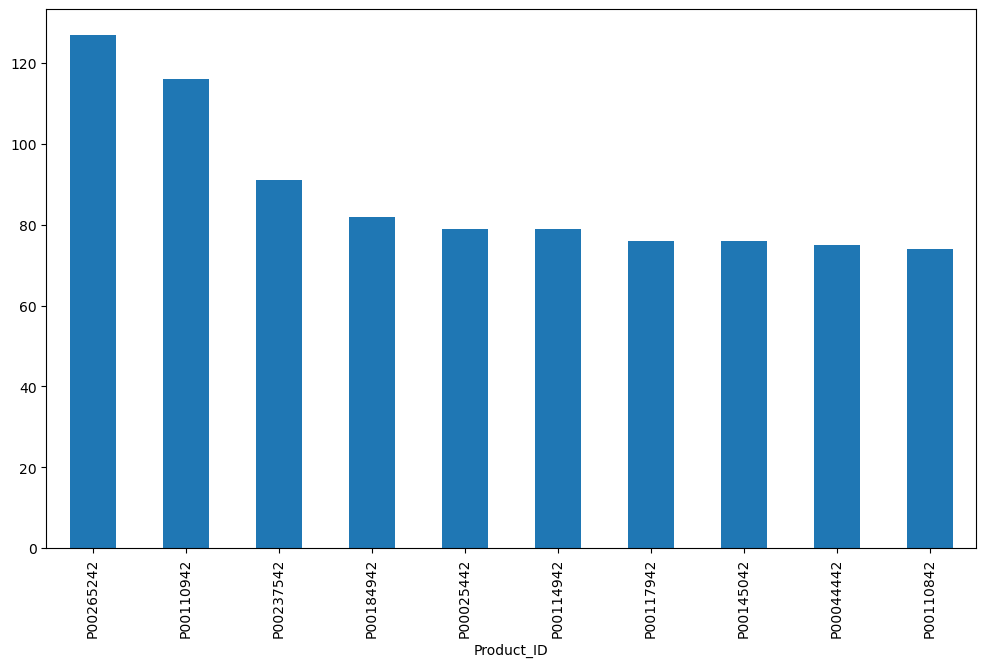

In [32]:
# top 10 most sold products (same thing as above)

fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

In [ ]:
#Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from 
#Food, Clothing and Electronics category